In [1]:
import os
import torch
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm

DATE = '2020-07-23_val'#'2020-07-17'
EXP = 'evaluation_run1'
LOAD_DIR = Path('../saved_data') / DATE / EXP

plots = []
fig_count = 0

# load data of all samples
states = dict()
support_calc = dict()
configs = dict()
actions = dict()
for sample in next(os.walk(LOAD_DIR))[1]:
    states.update({sample: torch.load(LOAD_DIR / sample / 'batch_states')})
    support_calc.update({sample: torch.load(LOAD_DIR / sample / 'support_calc')})
    configs.update({sample: torch.load(LOAD_DIR / sample / 'config')})
    actions.update({sample: torch.load(LOAD_DIR / sample / 'batch_actions')})

# define action for all the run, which just can be taken from the last sample as a representative
act = np.array(actions[sample]['FSC']['Shell']).mean()
if act == 0.0:
    action = ' - action: all decrease'
elif act == 1.0:
    action = ' - action: all maintain'
elif act == 2.0:
    action = ' - action: all increase'
else:
    action = ' - action: all random'

<h2><center>plots for beta - beta dependency</center></h2>

<IPython.core.display.Javascript object>


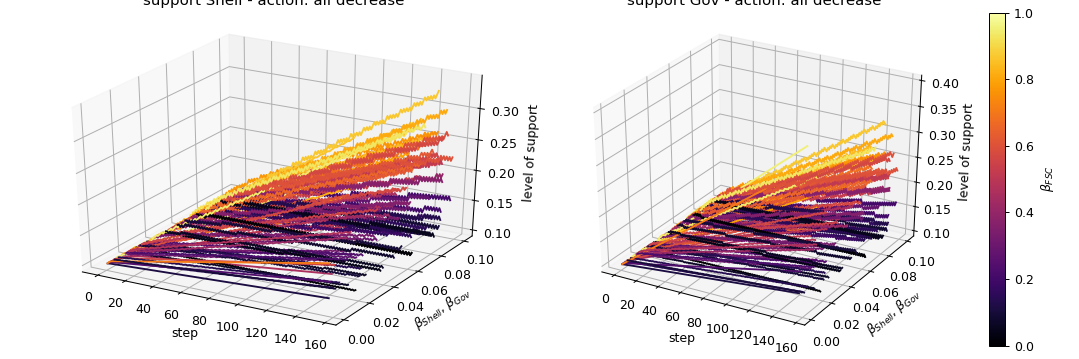

In [5]:
# %matplotlib inline
%matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('inferno')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\beta_{%s}$' % ('FSC'))

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        ax[i].plot(x, mean, configs[sample]['support_factor'][key], zdir='y',
                   c=(cmap(configs[sample]['support_factor']['FSC']*10)[0],
                      cmap(configs[sample]['support_factor']['FSC']*10)[1], 
                      cmap(configs[sample]['support_factor']['FSC']*10)[2]))
        ax[i].set_title('support ' + key + action)
        ax[i].set_xlabel('step')
        ax[i].set_ylabel((r'$\beta_{Shell}$, ' + r'$\beta_{Gov}$'))
        ax[i].set_zlabel('level of support')

<h2><center>plots for beta - delta_resource dependency</center></h2>


<IPython.core.display.Javascript object>


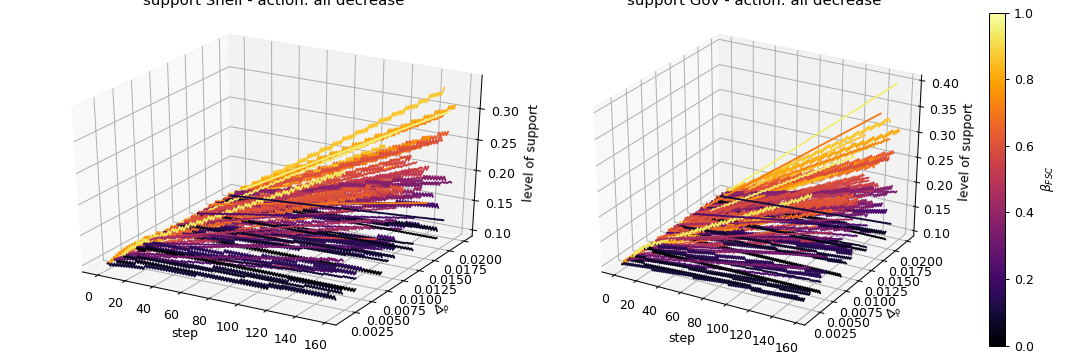

In [6]:
# %matplotlib inline
%matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('inferno')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\beta_{%s}$' % ('FSC'))

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        ax[i].plot(x, mean, configs[sample]['delta_resource'], zdir='y',
                   c=(cmap(configs[sample]['support_factor']['FSC']*10)[0],
                      cmap(configs[sample]['support_factor']['FSC']*10)[1], 
                      cmap(configs[sample]['support_factor']['FSC']*10)[2]))
        ax[i].set_title('support ' + key + action)
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\Delta_{\rho}$')
        ax[i].set_zlabel('level of support')
# fig.show()

<h2><center>plots for distribution of parameters</center></h2>

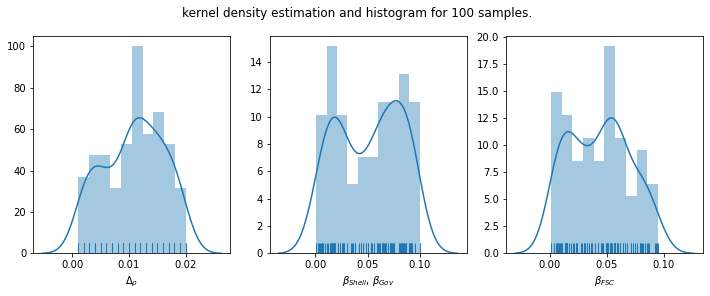

In [4]:
%matplotlib inline

import seaborn as sns
import copy

fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
labels = [r'$\Delta_{\rho}$', (r'$\beta_{Shell}$, ' + r'$\beta_{Gov}$'), r'$\beta_{FSC}$']
params = [[configs[sample]['delta_resource'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['support_factor']['Shell'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['support_factor']['FSC'] for sample in next(os.walk(LOAD_DIR))[1]]]

for i in range(0, len(labels)):
    sns.distplot(params[i], bins=10, ax=ax[i], rug=True)
    ax[i].set_xlabel(labels[i])
fig.suptitle('kernel density estimation and histogram for {} samples.'.format(len(params[2])));

In [ ]:
plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_shell_support' + '.pdf')), bbox_inches="tight")


In [6]:
import time
start = time.time()
for i in range(2000*2):
    actions = {'FSC': {'Shell': [], 'Gov': []}, 'Shell': {'FSC': []}}
print(time.time()-start)

def create_dict(required_nets, act_agt):
    new_dict = dict()
    for agt in act_agt:
        tmp = dict()
        for par_agt in required_nets[agt]:
            tmp[par_agt] = []
        new_dict[agt] = tmp
    return new_dict

REQUIRED_NEURAL_NETS = {'FSC':   ['Shell', 'Gov'],
                        'Shell': ['FSC'],
                        'Gov':   []}
ACT_AGT = ['FSC', 'Shell']
start = time.time()
for i in range(2000*2):
    act = create_dict(REQUIRED_NEURAL_NETS, ACT_AGT)
print(time.time()-start)

0.004997730255126953
0.007993459701538086
